In [1]:
from sklearnex import patch_sklearn

patch_sklearn()
from collections.abc import Iterable
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

from drowsiness_detection.data import (session_type_mapping, load_experiment_objects,
                                       load_preprocessed_train_test_splits, label_names_dict)
from drowsiness_detection.visualize import (plot_roc_curve_from_log_dir,
                                            plot_learning_curve_from_log_dir)
from drowsiness_detection import config



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
# fixed experiment params
EXPERIMENT_IDS = (16,)


## Plot ROC Curve of best model for 10, 20 and 60 seconds data

ID 14
test accuracy = 0.6505004934442408
train accuracy = 0.6463427694284797

ID 15
test accuracy = 0.6705865481141546
train accuracy = 0.6655288863066924

ID 16
test accuracy = 0.6972123825658402
train accuracy = 0.6951604726436065



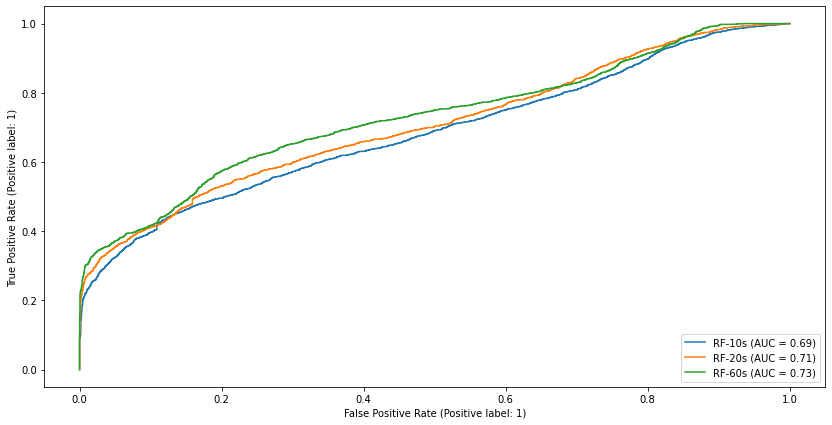

In [3]:
plt.rcParams["figure.figsize"] = 14, 7

fig, ax = plt.subplots()
# if not isinstance(ax, Iterable):

for experiment_id in EXPERIMENT_IDS:
    plot_roc_curve_from_log_dir(experiment_id=experiment_id, ax=ax, pos_label=1, plot_train_roc=False)


### Plot learning curve of best model for 10, 20 and 60 seconds data


loading from experiment with id:  16


FileNotFoundError: [Errno 2] No such file or directory: '../../logs/16/best_model.pkl'

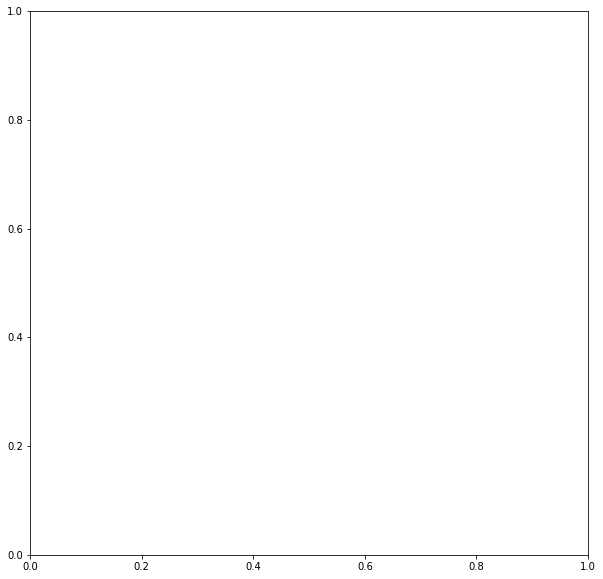

In [4]:
plt.rcParams["figure.figsize"] = 10, 10

n_estimator_options = np.logspace(2, 9, num=10, base=2)
_, axes = plt.subplots(len(EXPERIMENT_IDS), 1)
if not isinstance(axes, Iterable):  # if single experiment id given
    axes = [axes]
for experiment_id, ax in zip(EXPERIMENT_IDS, axes):
    plot_learning_curve_from_log_dir(experiment_id=experiment_id,
                                     n_estimator_options=n_estimator_options, ax=ax, flip_trick=True, logdir)


### Plot classification report of best model for 10, 20 and 60 seconds data


In [ ]:
for experiment_id in EXPERIMENT_IDS:
    exp_config, best_estimator, _ = load_experiment_objects(experiment_id=experiment_id)

    window_size = exp_config["window_in_sec"]
    config.set_paths(30, window_size)

    # load data
    X_train, X_test, y_train, y_test, _ = load_preprocessed_train_test_splits(
        data_path=config.PATHS.WINDOW_FEATURES,
        exclude_sess_type=session_type_mapping[exp_config["exclude_by"]],
        num_targets=exp_config["num_targets"],
        seed=exp_config["seed"],
        test_size=exp_config["test_size"])

    y_hat = best_estimator.predict(X_test)
    report = classification_report(y_true=y_test, y_pred=y_hat,
                                   target_names=label_names_dict[exp_config["num_targets"]])
    print(report)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
a = np.array([1,2,3,4,5,6,7,7,7,7])
plt.plot(a)
plt.plot(np.mean(a) + (np.mean(a) - a))
